<a href="https://colab.research.google.com/github/MonitSharma/Numerical-Linear-Algebra/blob/main/The_Moore_Penrose_Pseudoinverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)

Populating the interactive namespace from numpy and matplotlib


# Introduction
We saw that not all matrices have an inverse. It is unfortunate because the inverse is used to solve system of equations. In some cases, a system of equation has no solution, and thus the inverse doesn't exist. However it can be useful to find a value that is almost a solution (in term of minimizing the error). We will see for instance how we can find the best-fit line of a set of data points with the pseudoinverse.

# The Moore-Penrose Pseudoinverse
The Moore-Penrose pseudoinverse is a direct application of the SVD But before all, we have to remind that systems of equations can be expressed under the matrix form.

--- 

The inverse of a marix $A$ can be used to solve the equation $Ax=b$


$$ {A}^{-1}{Ax}={A}^{-1}{b}$$

$$ {I}_n{x}={A}^{-1}{b}$$

$$ {x}={A}^{-1}{b}$$


-------


But in the case where the set of equations have 0 or many solutions the inverse cannot be found and the equation cannot be solved. The pseudoinverse is ${A}^+$
 such as:


 $$ {A}{A}^+\approx{I_n}$$


 minimizing 
 $$ ||{{A}{A}^+-{I_n}}||_2$$


------

The following formula can be used to find the pseudoinverse

$$ {A}^+= {VD}^+{U}^T$$


with $U$
, $D$
 and $V$
 respectively the left singular vectors, the singular values and the right singular vectors of $A$
 ${A}^+$
 is the pseudoinverse of $A$
 and $D^+$
 the pseudoinverse of $D$
. We saw that $D$
 is a diagonal matrix and thus $D^+$
 can be calculated by taking the reciprocal of the non zero values of $D$ 
.

------


This is a bit crude but we will see some examples to clarify all of this.

### Example 1.
Let's see how to implement that. We will create a non square matrix 
, calculate its singular value decomposition and its pseudoinverse.

$${A}=\begin{bmatrix}
    7 & 2\\\\
    3 & 4\\\\
    5 & 3
\end{bmatrix}$$

In [3]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)

D_plus = np.zeros((A.shape[0], A.shape[1])).T
D_plus[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))

A_plus = V.T.dot(D_plus).dot(U.T)
A_plus

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

We can now check with the `pinv()` function from Numpy that the pseudoinverse is correct:



In [4]:
np.linalg.pinv(A)

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

It looks good! We can now check that it is really the near inverse of $A$ 
. Since we know that

$${A}^{-1}{A}={I_n}$$

with 
$${I_2}=\begin{bmatrix}
    1 & 0 \\\\
    0 & 1
\end{bmatrix}$$

In [5]:
A_plus.dot(A)

array([[1.00000000e+00, 2.70616862e-16],
       [2.28983499e-16, 1.00000000e+00]])

This is not bad! This is almost the identity matrix!

Another way of computing the pseudoinverse is to use this formula:

$$ ({A}^T{A})^{-1}{A}^T$$

The result is less acurate than the SVD method and Numpy `pinv()` uses the SVD. Here is an example from the same matrix $A$ 
:



In [6]:
A_plus_1 = np.linalg.inv(A.T.dot(A)).dot(A.T)
A_plus_1

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

In this case the result is the same as with the SVD way.

## Using the pseudoinverse to solve a overdetermined system of linear equations

The pseudoinverse solve the system in the least square error perspective: it finds the solution that minimize the error. We will see this more explicitly with an example.

The pseudoinverse solve the system in the least square error perspective



#### Example 2

We will consider the following

$$ \begin{cases}
-2x_1 + 2 = x_2 \\\\
4x_1 + 8 = x_2 \\\\
-1x_1 + 2 = x_2
\end{cases}
\Leftrightarrow
\begin{cases}
-2x_1 - x_2 = -2 \\\\
4x_1 - x_2 = -8 \\\\
-1x_1 - x_2 = -2
\end{cases}$$


Let's see the graph

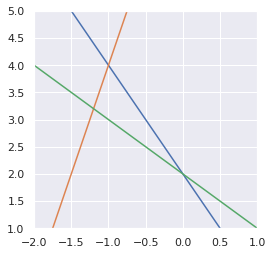

In [7]:
x1 = np.linspace(-5, 5, 1000)
x2_1 = -2*x1 + 2
x2_2 = 4*x1 + 8
x2_3 = -1*x1 + 2

plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)
plt.show()

We actually see that there is no solution.

Putting this into the matrix form we have:

$${A}=
\begin{bmatrix}
    -2 & -1 \\\\
    4 & -1 \\\\
    -1 & -1
\end{bmatrix}$$

$$ {x}=
\begin{bmatrix}
    x_1 \\\\
    x_2
\end{bmatrix}$$

and

$$ {b}=
\begin{bmatrix}
    -2 \\\\
    -8 \\\\
    -2
\end{bmatrix}$$

So we have

$$ {Ax} = {b}
\Leftrightarrow
\begin{bmatrix}
    -2 & -1 \\\\
    4 & -1 \\\\
    -1 & -1
\end{bmatrix}
\begin{bmatrix}
    x_1 \\\\
    x_2
\end{bmatrix}
=
\begin{bmatrix}
    -2 \\\\
    -8 \\\\
    -2
\end{bmatrix}$$


We will now calculate the pseudoinverse of $A$

In [8]:
A = np.array([[-2, -1], [4, -1], [-1, -1]])
A_plus = np.linalg.pinv(A)
A_plus

array([[-0.11290323,  0.17741935, -0.06451613],
       [-0.37096774, -0.27419355, -0.35483871]])

Now that we have calculated the pseudoinverse of $A$
:

$$ {A}^+=
\begin{bmatrix}
    -0.11290323 &  0.17741935 & -0.06451613 \\\\
    -0.37096774 & -0.27419355 & -0.35483871
\end{bmatrix}$$

we can use it to find $x$ knowing that

$$ x = A^+ b$$

with

$$ {x}
=
\begin{bmatrix}
    x1 \\\\
    x2
\end{bmatrix}$$

In [9]:
b = np.array([[-2], [-8], [-2]])
res = A_plus.dot(b)
res

array([[-1.06451613],
       [ 3.64516129]])

So we have

$$\begin{align*}
{A}^+{b}&=
\begin{bmatrix}
    -0.11290323 &  0.17741935 & -0.06451613 \\\\
    -0.37096774 & -0.27419355 & -0.35483871
\end{bmatrix}
\begin{bmatrix}
    -2 \\\\
    -8 \\\\
    -2
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    -1.06451613 \\\\
    3.64516129
\end{bmatrix}
\end{align*}$$


In our two dimensions, the coordinates of $x$ are 

$$ \begin{bmatrix}
    -1.06451613 \\\\
    3.64516129
\end{bmatrix}$$

Let's plot this point along with the equation lines


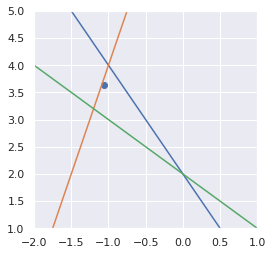

In [10]:
plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)

plt.scatter(res[0], res[1])

plt.show()

Maybe you would have expected the point being at the barycenter of the triangle . This is not the case becase the equations are not scaled the same way. Actually the point is at the intersection of the three symmedians of the triangle.

#### Example 3.
This method can also be used to fit a line to a set of points.

----

We have this set of 
$x$ and $y$
 and we are looking for the line $y = mx+b$
 that minimizes the error. The error can be evaluated as the sum of the differences between the fit and the actual data points. We can represent the data points with a matrix equations:



 $$ {Ax} = {b}
\Leftrightarrow
\begin{bmatrix}
    0 & 1 \\\\
    1 & 1 \\\\
    2 & 1 \\\\
    3 & 1 \\\\
    3 & 1 \\\\
    4 & 1
\end{bmatrix}
\begin{bmatrix}
    m \\\\
    b
\end{bmatrix}
=
\begin{bmatrix}
    2 \\\\
    4 \\\\
    0 \\\\
    2 \\\\
    5 \\\\
    3
\end{bmatrix}$$


Note that here the matrix $A$
 represents the values of the coefficients. The column of 1 correspond to the intercepts (without it the fit would have the constraint to cross the origin). It gives the following set of equations:

 $$ \begin{cases}
    0m + 1b = 2 \\\\
    1m + 1b = 4 \\\\
    2m + 1b = 0 \\\\
    3m + 1b = 2 \\\\
    3m + 1b = 5 \\\\
    4m + 1b = 3
\end{cases}$$


-----

We have the set of equations $mx+b=y$
. The ones are used to give back the intercept parameter. For instance, in the first equation corresponding to the first point we have well $x=0$
 and $y=2$
. This can be confusing because here the vector 
 corresponds to the coefficients. This is because the problem is different from the other examples: we are looking for the coefficients of a line and not for 
$x$ and $y$
 unknowns. We kept this notation to indicate the similarity with the last examples.

------


So we will construct these matrices and try to use the pseudoinverse to find the equation of the line minimizing the error (difference between the line and the actual data points).

Let's start with the creation of the matrix of $A$
 and $b$
:

In [11]:
A = np.array([[0, 1], [1, 1], [2, 1], [3, 1], [3, 1], [4, 1]])
A

array([[0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [3, 1],
       [4, 1]])

In [12]:
b = np.array([[2], [4], [0], [2], [5], [3]])
b

array([[2],
       [4],
       [0],
       [2],
       [5],
       [3]])

We can now calculate the pseudoinverse of $A$

:

In [13]:
A_plus = np.linalg.pinv(A)
A_plus

array([[-2.00000000e-01, -1.07692308e-01, -1.53846154e-02,
         7.69230769e-02,  7.69230769e-02,  1.69230769e-01],
       [ 6.00000000e-01,  4.00000000e-01,  2.00000000e-01,
         4.00160154e-17,  4.00160154e-17, -2.00000000e-01]])

and apply it to the result to find the coefficients with the formula:
$$ x = A^+b$$

In [14]:
coefs = A_plus.dot(b)
coefs

array([[0.21538462],
       [2.2       ]])

These are the parameters of the fit. The slope is $m=0.21538462$
 and the intercept is $b=2.2$
. We will plot the data points and the regression line:

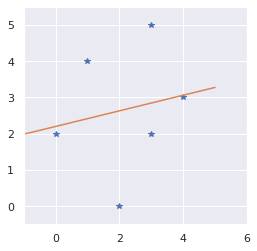

In [15]:
x = np.linspace(-1, 5, 1000)
y = coefs[0]*x + coefs[1]

plt.plot(A[:, 0], b, '*')
plt.plot(x, y)
plt.xlim(-1., 6)
plt.ylim(-0.5, 5.5)

plt.show()

You can also do the fit with the Numpy `polyfit()` to check the parameters:

In [16]:
np.polyfit(A[:, 0], b, 1)

array([[0.21538462],
       [2.2       ]])

That's good! We have seen how to use the pseudoinverse in order to solve a simple regression problem. Let's see with a more realistic case.

#### Example 4.
To see the process with more data points we can generate data

We will generate a column vector (see `reshape()` below) containing 100 points with random 
 values and pseudo-random 
 values. The function `seed()` from the Numpy.random package is used to freeze the randomisation and be able to reproduce the results:

In [17]:
np.random.seed(123)
x = 5*np.random.rand(100)
y = 2*x + 1 + np.random.randn(100)

x = x.reshape(100, 1)
y = y.reshape(100, 1)

We will create the matrix $A$
 from $x$
 by adding a column of ones exactly like we did in the example 3.

In [18]:
A = np.hstack((x, np.ones(np.shape(x))))
A[:10]

array([[3.48234593, 1.        ],
       [1.43069667, 1.        ],
       [1.13425727, 1.        ],
       [2.75657385, 1.        ],
       [3.59734485, 1.        ],
       [2.1155323 , 1.        ],
       [4.90382099, 1.        ],
       [3.42414869, 1.        ],
       [2.40465951, 1.        ],
       [1.96058759, 1.        ]])

We can now find the pseudoinverse of $A$ 
 and calculate the coefficients of the regression line:

In [19]:
A_plus = np.linalg.pinv(A)
coefs = A_plus.dot(y)
coefs

array([[1.9461907 ],
       [1.16994745]])

We can finally draw the point and the regression line:

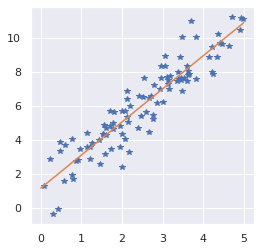

In [20]:
x_line = np.linspace(0, 5, 1000)
y_line = coefs[0]*x_line + coefs[1]

plt.plot(x, y, '*')
plt.plot(x_line, y_line)
plt.show()

## Conclusion
You can see that the pseudoinverse can be very useful for this kind of problems! The series is not completely finished since we still have 3 chapters to cover. However, we have done the hardest part! We will now see two very light chapters before going to a nice example using all the linear algebra we have learn: the PCA.